# Question 1

In [1]:
install.packages("readr")
devtools::install_github("homerhanumat/tigerstats",build_vignettes=TRUE)

Installation du package dans 'C:/Users/David/AppData/Roaming/SPB_Data/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'readr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\David\AppData\Local\Temp\Rtmpe2VimV\downloaded_packages


Skipping install of 'tigerstats' from a github remote, the SHA1 (17067f7e) has not changed since last install.
  Use `force = TRUE` to force installation



In [2]:
#test branche

In [3]:
library(readr)
library(tigerstats)
library(ggplot2)
library(gridExtra)

Le chargement a nécessité le package : abd

Le chargement a nécessité le package : nlme

Le chargement a nécessité le package : lattice

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : mosaic

Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attachement du package : 'mosaic'


Les objets suivants sont masqués depuis 'package:dplyr':

    count, do, tally


L'objet suivant est masqué depuis 'package:Matrix':

    mean


L'objet suivant est masqué depuis 'package:ggplot2':

    stat


Les objets suivants sont masqués depuis 'package:stats':

    binom.test, cor, cor.test, cov, fivenum, IQR, median, prop.test,
    quantile, sd, t.test, var


Les objets suivants sont masqués depuis 'package:base'

In [4]:
cd <- read_tsv("clinical-data.tsv") 
spec(cd)
summary(cd)


Rows: 136 Columns: 12
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: "\t"
chr (5): SMPLID, SMPTHNTS, COHORT, SUBJID, IMGURL
dbl (7): SEX, AGE, HGHT, WGHT, BMI, TRISCHD, DTHHRDY

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  SMPLID = col_character(),
  SEX = col_double(),
  AGE = col_double(),
  HGHT = col_double(),
  WGHT = col_double(),
  BMI = col_double(),
  SMPTHNTS = col_character(),
  COHORT = col_character(),
  TRISCHD = col_double(),
  DTHHRDY = col_double(),
  SUBJID = col_character(),
  IMGURL = col_character()
)

    SMPLID               SEX            AGE             HGHT      
 Length:136         Min.   :1.00   Min.   :21.00   Min.   :58.00  
 Class :character   1st Qu.:1.00   1st Qu.:30.00   1st Qu.:66.00  
 Mode  :character   Median :1.00   Median :38.00   Median :68.00  
                    Mean   :1.36   Mean   :37.53   Mean   :68.18  
                    3rd Qu.:2.00   3rd Qu.:45.25   3rd Qu.:71.00  
                    Max.   :2.00   Max.   :49.00   Max.   :76.00  
      WGHT            BMI          SMPTHNTS            COHORT         
 Min.   : 92.0   Min.   :18.58   Length:136         Length:136        
 1st Qu.:159.8   1st Qu.:24.27   Class :character   Class :character  
 Median :184.8   Median :27.75   Mode  :character   Mode  :character  
 Mean   :182.9   Mean   :27.55                                        
 3rd Qu.:205.2   3rd Qu.:31.07                                        
 Max.   :264.0   Max.   :34.86                                        
    TRISCHD          DTHHRDY      

## 1.1 : Distribution of the clinical variables

### 1) Sex

In [5]:
## Pour comparer les distributions avec celles du dataset de base : 
## https://ftp.ncbi.nlm.nih.gov/dbgap/studies/phs000424/phs000424.v8.p2/pheno_variable_summaries/phs000424.v8.pht002742.v8.GTEx_Subject_Phenotypes.data_dict.xml

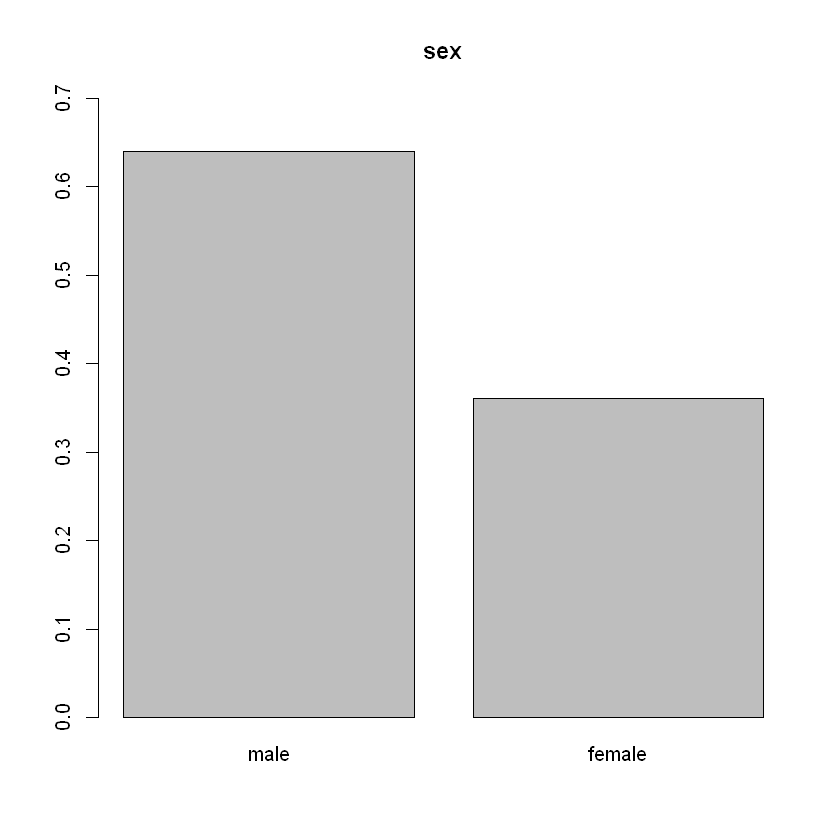

In [6]:
barplot(prop.table(table(data.frame(cd$SEX))), main="sex", names.arg=c("male","female"), ylim=c(0.0,0.7))

### 2) Age

 min Q1 median    Q3 max     mean       sd   n missing
  21 30     38 45.25  49 37.52941 8.611741 136       0


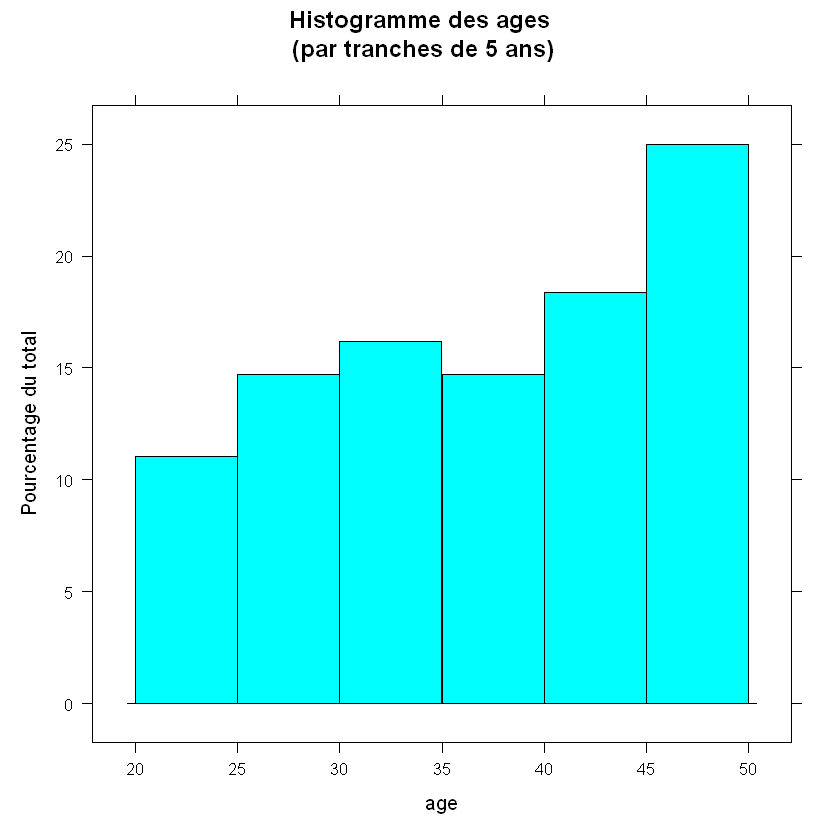

In [7]:
histogram(data.frame(cd$AGE)[,1],main="Histogramme des ages\n (par tranches de 5 ans)", xlab="age",breaks=5)
print(favstats(data.frame(cd$AGE)[,1]))

#Ca va que jusqu'à 50 ans

### 3) Tailles

 min Q1 median Q3 max     mean      sd   n missing
  58 66     68 71  76 68.18478 3.89909 136       0


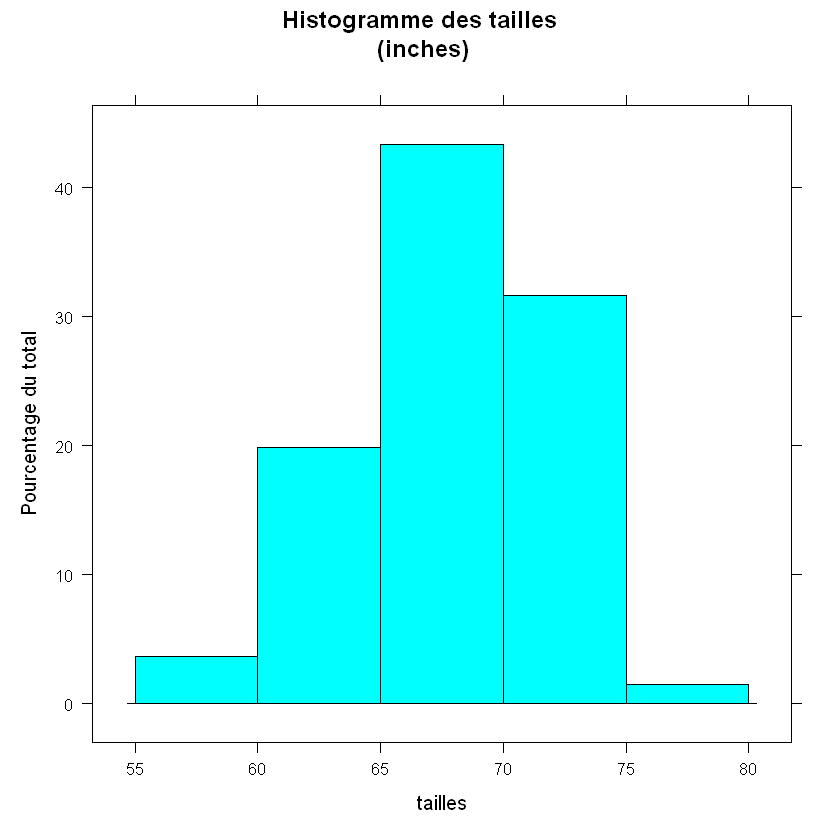

In [8]:
histogram(data.frame(cd$HGHT)[,1],main="Histogramme des tailles\n (inches)", xlab="tailles",breaks=6)
print(favstats(data.frame(cd$HGHT)[,1]))

### 4) Poids

 min     Q1 median     Q3 max     mean       sd   n missing
  92 159.75  184.8 205.25 264 182.9454 33.58838 136       0


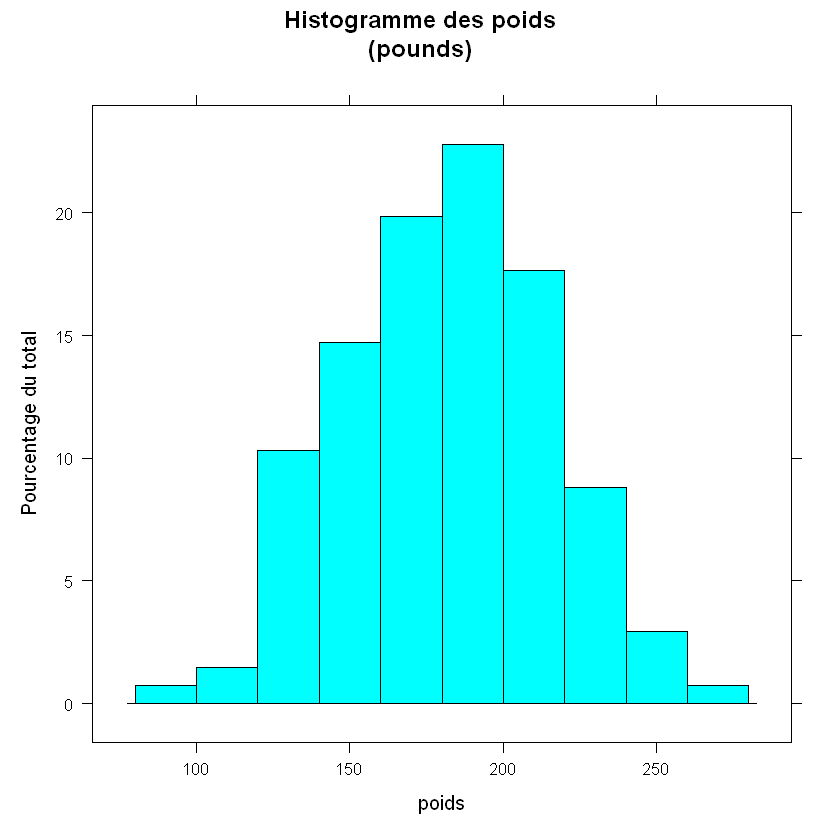

In [9]:
histogram(data.frame(cd$WGHT)[,1],main="Histogramme des poids\n (pounds) ", xlab="poids", breaks=7)
print(favstats(data.frame(cd$WGHT)[,1]))

### 5) Indice de masse corporelle

   min      Q1 median      Q3   max     mean       sd   n missing
 18.58 24.2675  27.75 31.0725 34.86 27.55471 3.925531 136       0


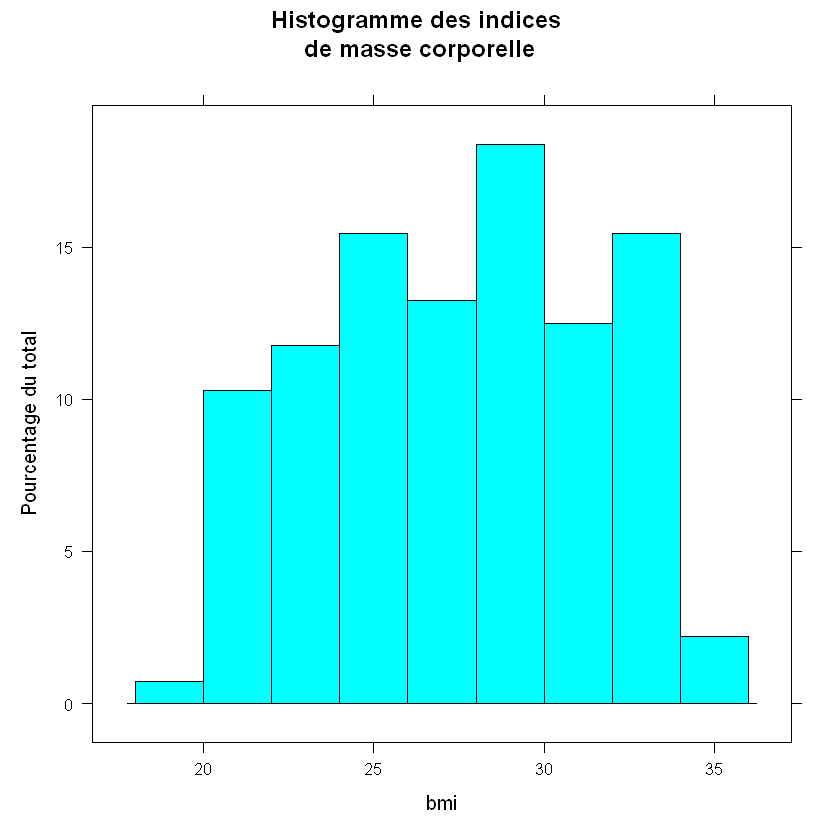

In [10]:
histogram(data.frame(cd$BMI)[,1],main="Histogramme des indices \n de masse corporelle ", xlab="bmi", breaks=6)
print(favstats(data.frame(cd$BMI)[,1]))

### 6) Cohorte

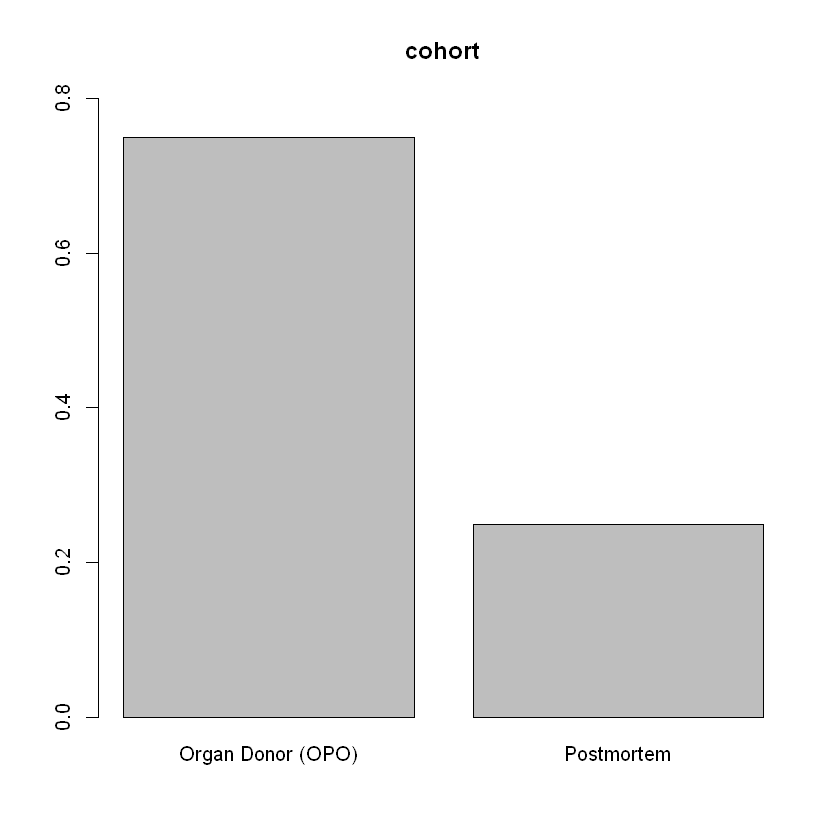

In [11]:
barplot(prop.table(table(data.frame(cd$COHORT))), main="cohort", ylim=c(0.0,0.8))
#Corrélation age - cohorte ?

### 7) Temps ischémique

 min   Q1 median     Q3  max     mean      sd   n missing
  15 61.5    209 474.25 1641 382.5588 411.018 136       0


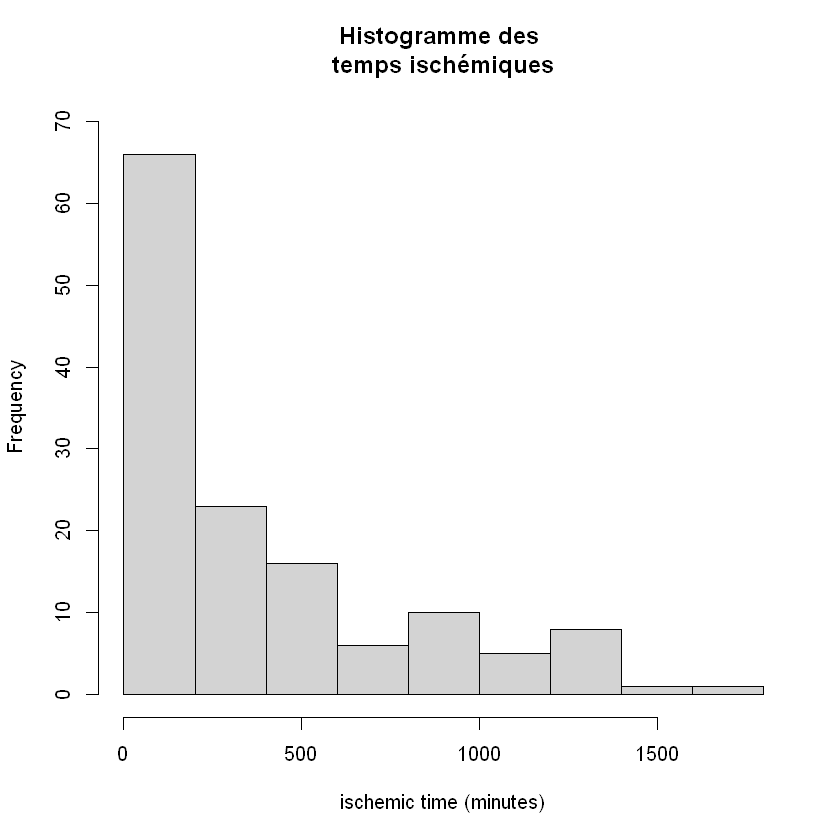

In [12]:
hist(data.frame(cd$TRISCHD)[,1],main="Histogramme des \n temps ischémiques ", xlab="ischemic time (minutes)", ylim=c(0,70))
print(favstats(data.frame(cd$TRISCHD)[,1]))

### 8) Echelle de Hardy

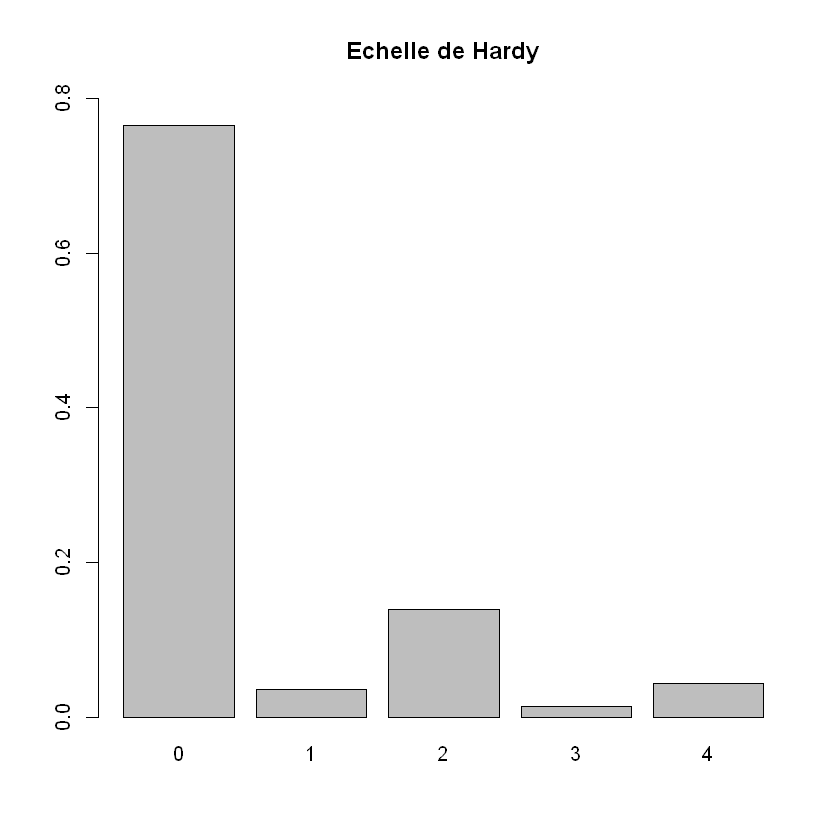

In [13]:
barplot(prop.table(table(data.frame(cd$DTHHRDY))), main="Echelle de Hardy", ylim=c(0.0,0.8))

## 1.2 : Correlation between variables

### Liaisons entre les variables "démographiques"
#### Sexe = variable catégorielle --> comparaison visuelle avec boxplot 

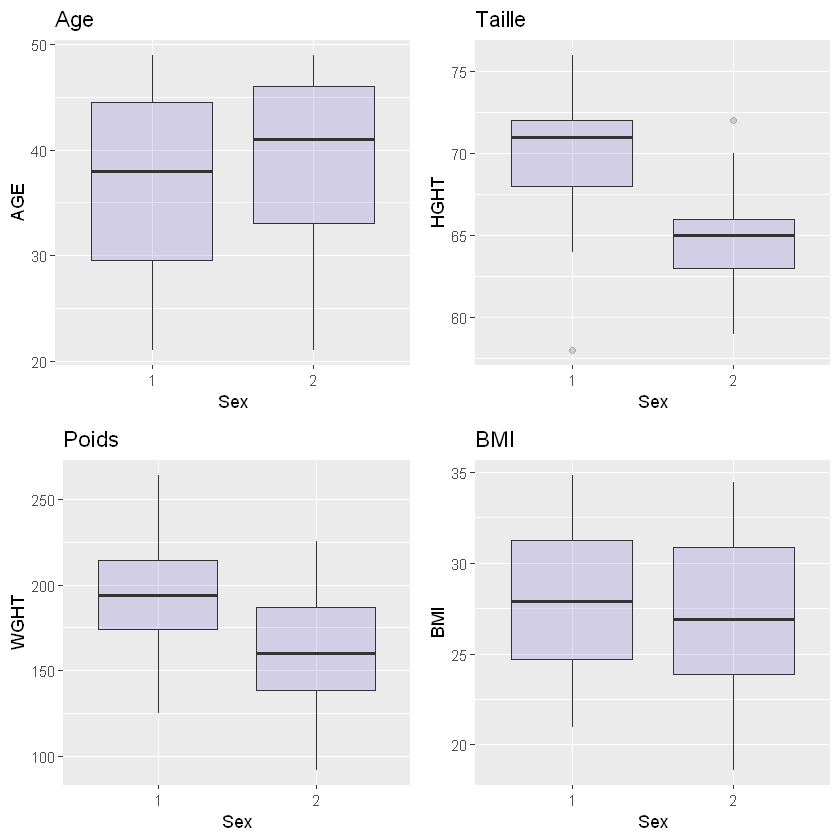

In [14]:
# Boxplots avec les différentes variables en fct de sex
p1 <- ggplot(cd,aes(x=as.factor(SEX), y=AGE)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + ggtitle("Age") + 
    xlab("Sex")
p2 <- ggplot(cd,aes(x=as.factor(SEX), y=HGHT)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Sex") + ggtitle("Taille")

p3 <- ggplot(cd,aes(x=as.factor(SEX), y=WGHT)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Sex") + ggtitle("Poids")
p4 <- ggplot(cd,aes(x=as.factor(SEX), y=BMI)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Sex") + ggtitle("BMI")

grid.arrange(p1,p2,p3,p4, ncol=2)

#### Vérification avec tests de Mann-Whitney

In [15]:
# 2 nouveaux dataframes : hommes et femmes
hommes <- filter(cd, SEX == 1)
femmes <- filter(cd, SEX == 2)

#unpaired two-samples Wilcoxon test =  Wilcoxon rank sum test = Mann-Whitney test
# Calcul des tests de Mann-Whitney pour les différentes variables :

w_age <- wilcox.test(hommes$AGE, femmes$AGE)$p.value
w_hght <- wilcox.test(hommes$HGHT, femmes$HGHT)$p.value
w_wght <- wilcox.test(hommes$WGHT, femmes$WGHT)$p.value
w_bmi <- wilcox.test(hommes$BMI, femmes$BMI)$p.value

print(paste('p-value for age : ', toString(w_age)))
print(paste('p-value for hght : ', toString(w_hght)))
print(paste('p-value for wght : ', toString(w_wght)))
print(paste('p-value for bmi : ', toString(w_bmi)))


## On constate que les variables du poids et de la taille ne sont clairement pas indépendante du sexe, mais on ne peut pas 
## tirer cette conclusion pour l'age et l'indice de masse corporelle, ce qui correspond à ce qu'on observait sur les boxplots

[1] "p-value for age :  0.131321452047474"
[1] "p-value for hght :  3.51914176038072e-16"
[1] "p-value for wght :  1.48960430486491e-07"
[1] "p-value for bmi :  0.377965307143104"


#### Comparaison des variables numériques (age, taille, poids, bmi)

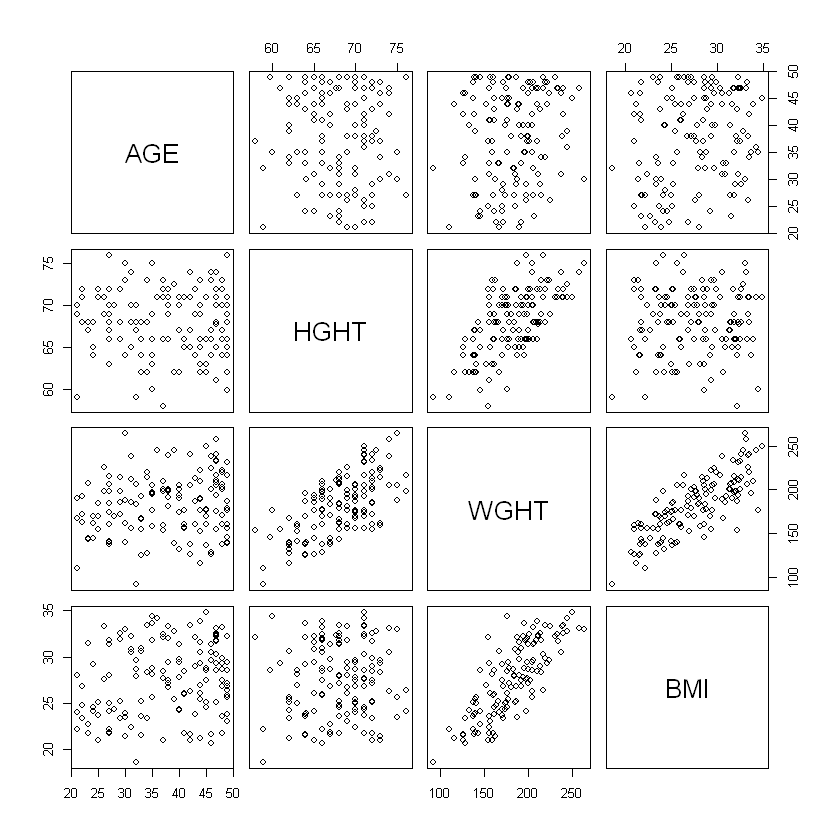

In [16]:
pairs(cd[3:6])
## On observe des corrélations entre la taille et le poids, et entre le poids et le bmi

In [17]:
corr = cor(cd[3:6])
corr

,AGE,HGHT,WGHT,BMI
AGE,1.00000000,-0.03838808,0.1527637,0.21438471
HGHT,-0.03838808,1.00000000,0.6391171,0.04597517
WGHT,0.15276366,0.63911706,1.0000000,0.79163615
BMI,0.21438471,0.04597517,0.7916362,1.00000000


### Liaisons des variables techniques avec les variables démographiques
#### Cohorte : 

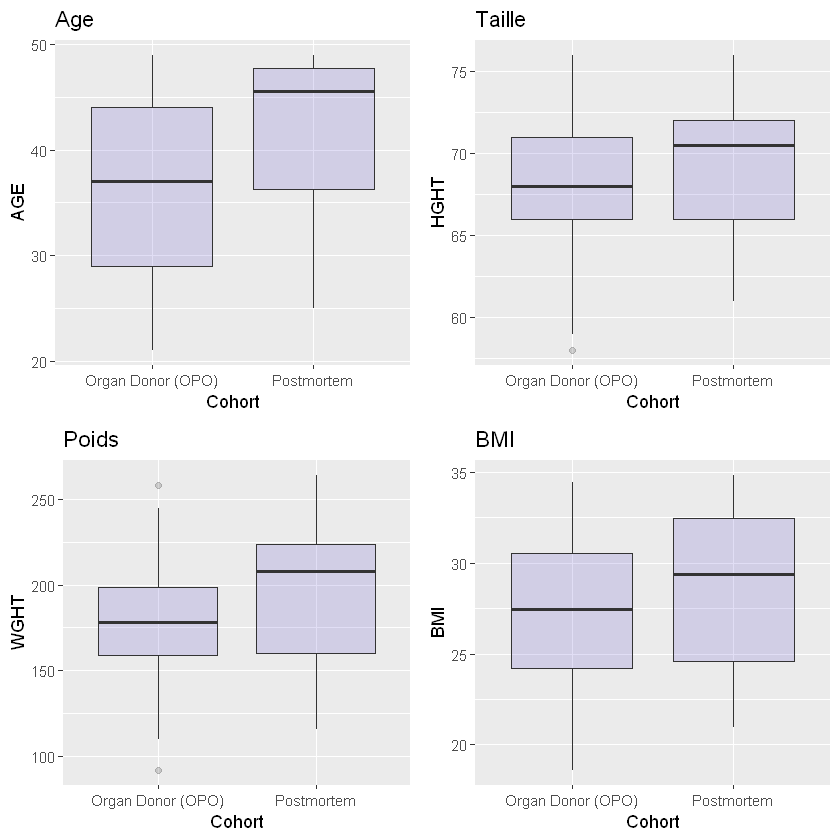

In [18]:
# Boxplots avec les différentes variables en fct de cohort
p1 <- ggplot(cd,aes(x=as.factor(COHORT), y=AGE)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + ggtitle("Age") + 
    xlab("Cohort")
p2 <- ggplot(cd,aes(x=as.factor(COHORT), y=HGHT)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Cohort") + ggtitle("Taille")

p3 <- ggplot(cd,aes(x=as.factor(COHORT), y=WGHT)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Cohort") + ggtitle("Poids")
p4 <- ggplot(cd,aes(x=as.factor(COHORT), y=BMI)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Cohort") + ggtitle("BMI")

grid.arrange(p1,p2,p3,p4, ncol=2)

In [19]:
# 2 nouveaux dataframes : organ donors et postmortems
od <- filter(cd, COHORT == 'Organ Donor (OPO)')
pm <- filter(cd, COHORT == 'Postmortem')

#unpaired two-samples Wilcoxon test =  Wilcoxon rank sum test = Mann-Whitney test
# Calcul des tests de Mann-Whitney pour les différentes variables :

w_age <- wilcox.test(od$AGE, pm$AGE)$p.value
w_hght <- wilcox.test(od$HGHT, pm$HGHT)$p.value
w_wght <- wilcox.test(od$WGHT, pm$WGHT)$p.value
w_bmi <- wilcox.test(od$BMI, pm$BMI)$p.value

print(paste('p-value for age : ', toString(w_age)))
print(paste('p-value for hght : ', toString(w_hght)))
print(paste('p-value for wght : ', toString(w_wght)))
print(paste('p-value for bmi : ', toString(w_bmi)))

## On voit ici que comme suggéré par les boxplots, les 2 cohortes représentent 2 populations qui sont 
## significativement différentes relativement aux paramètres de l'age et du poids

[1] "p-value for age :  0.000715351356559735"
[1] "p-value for hght :  0.0793189642162195"
[1] "p-value for wght :  0.0113078041343223"
[1] "p-value for bmi :  0.105604145672584"


In [20]:
table(cd$COHORT,cd$SEX)
prop.table(table(cd$COHORT,cd$SEX))

                   
                     1  2
  Organ Donor (OPO) 66 36
  Postmortem        21 13

                   
                             1          2
  Organ Donor (OPO) 0.48529412 0.26470588
  Postmortem        0.15441176 0.09558824

In [21]:
fisher.test(cd$COHORT,cd$SEX)
#p-value > 0.05 --> on ne peut pas rejeter l'hypothèse d'indépendance des variables


	Fisher's Exact Test for Count Data

data:  cd$COHORT and cd$SEX
p-value = 0.8373
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.4633356 2.7041048
sample estimates:
odds ratio 
  1.133851 


#### Echelle de Hardy

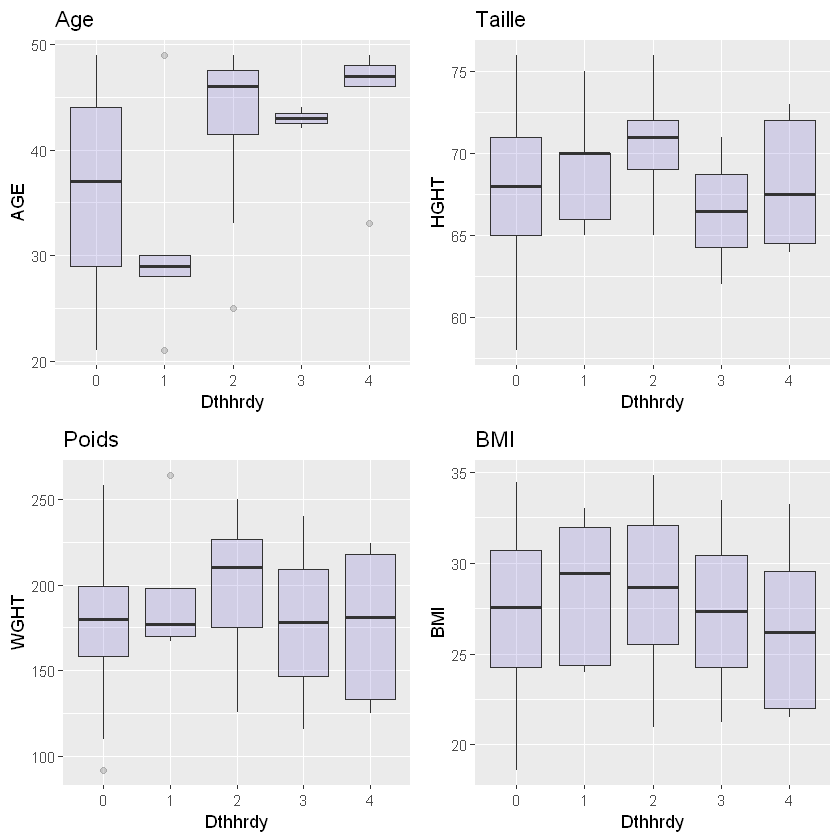

In [22]:
# Boxplots avec les différentes variables en fct de sex
p1 <- ggplot(cd,aes(x=as.factor(DTHHRDY), y=AGE)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + ggtitle("Age") + 
    xlab("Dthhrdy")
p2 <- ggplot(cd,aes(x=as.factor(DTHHRDY), y=HGHT)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Dthhrdy") + ggtitle("Taille")

p3 <- ggplot(cd,aes(x=as.factor(DTHHRDY), y=WGHT)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Dthhrdy") + ggtitle("Poids")
p4 <- ggplot(cd,aes(x=as.factor(DTHHRDY), y=BMI)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Dthhrdy") + ggtitle("BMI")

grid.arrange(p1,p2,p3,p4, ncol=2)

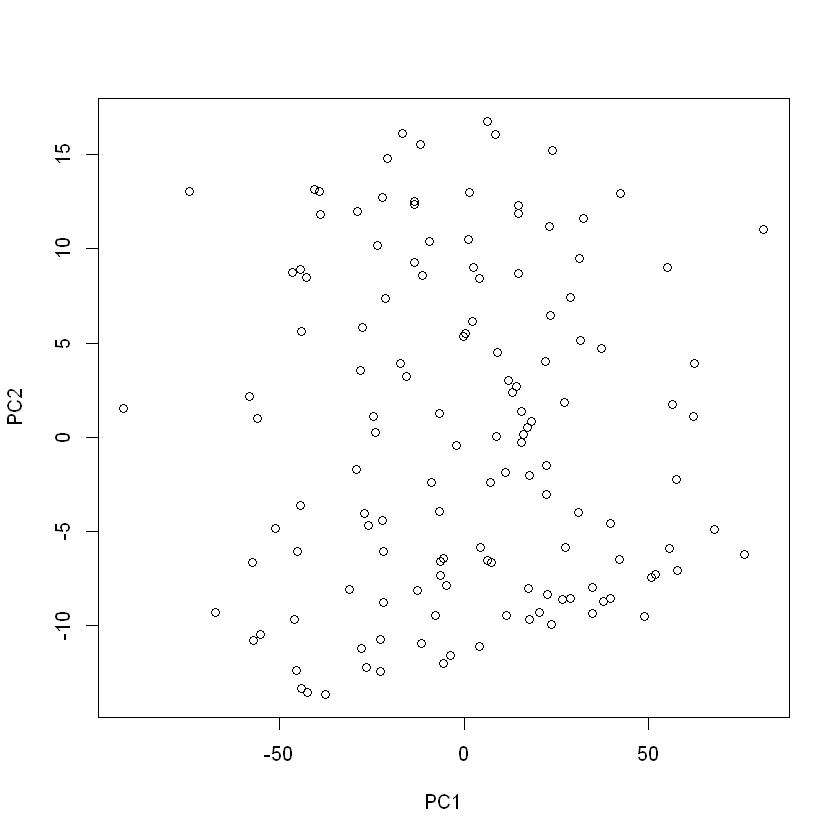

In [23]:
pca = prcomp(cd[3:6])
plot(pca$x[, 1:2])

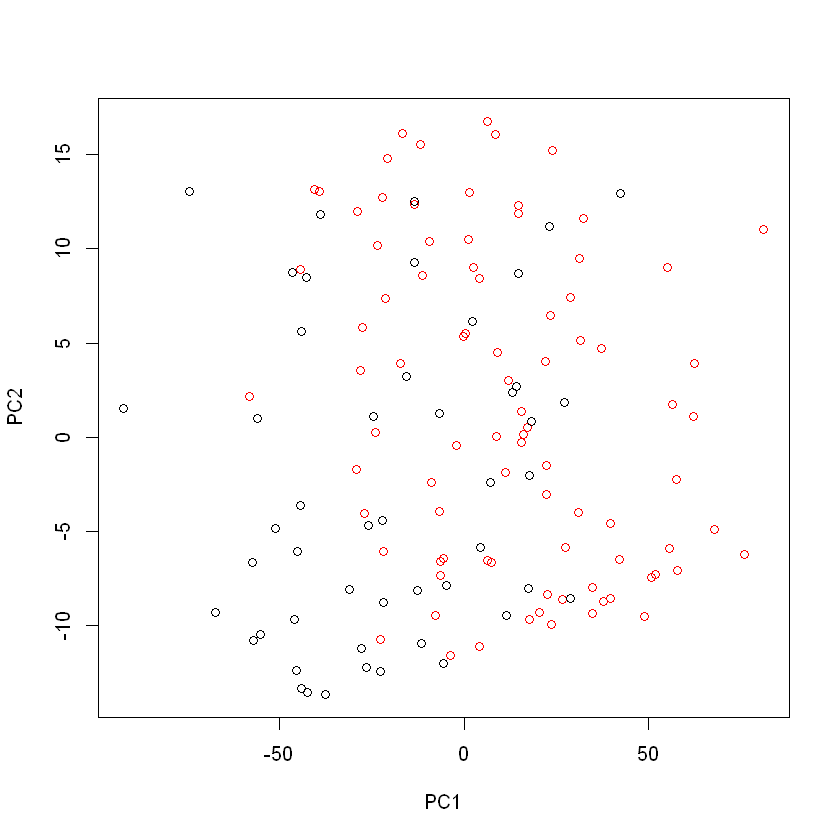

In [24]:
colors <- rep("black", 136)
colors[cd$SEX == 1] <- "red"
plot(pca$x[, 1:2], col=colors)

## Confounding variables

In [25]:
colors<-rep("black", 136)
colors[cd$COHORT=="Postmortem"] <- "red"

In [26]:
shapes = c(1, 3) 
shapes<-shapes[as.numeric(cd$SEX)]

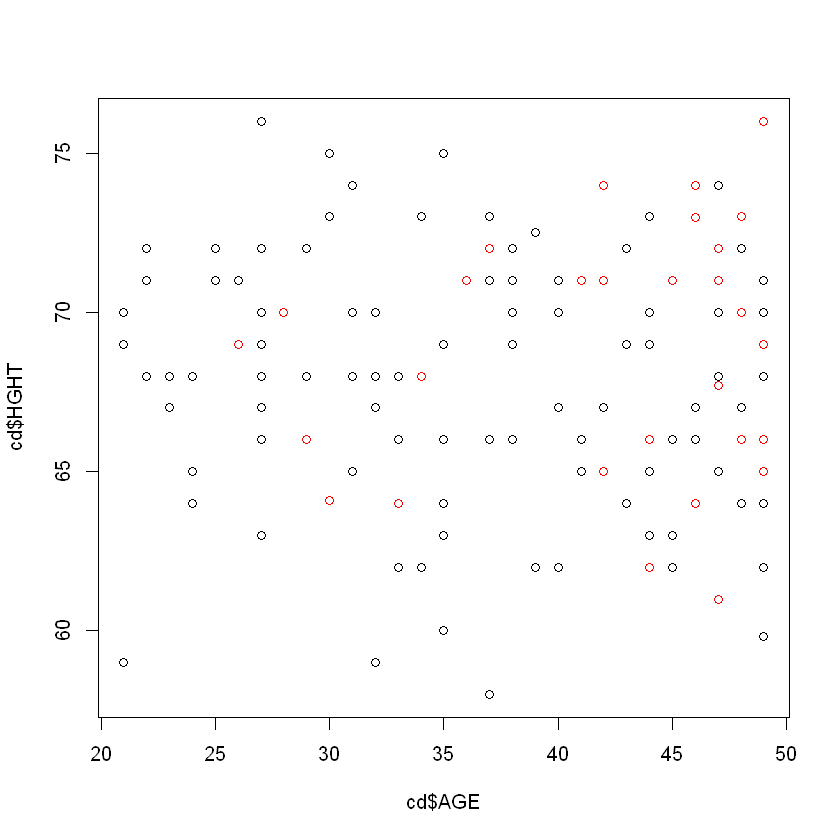

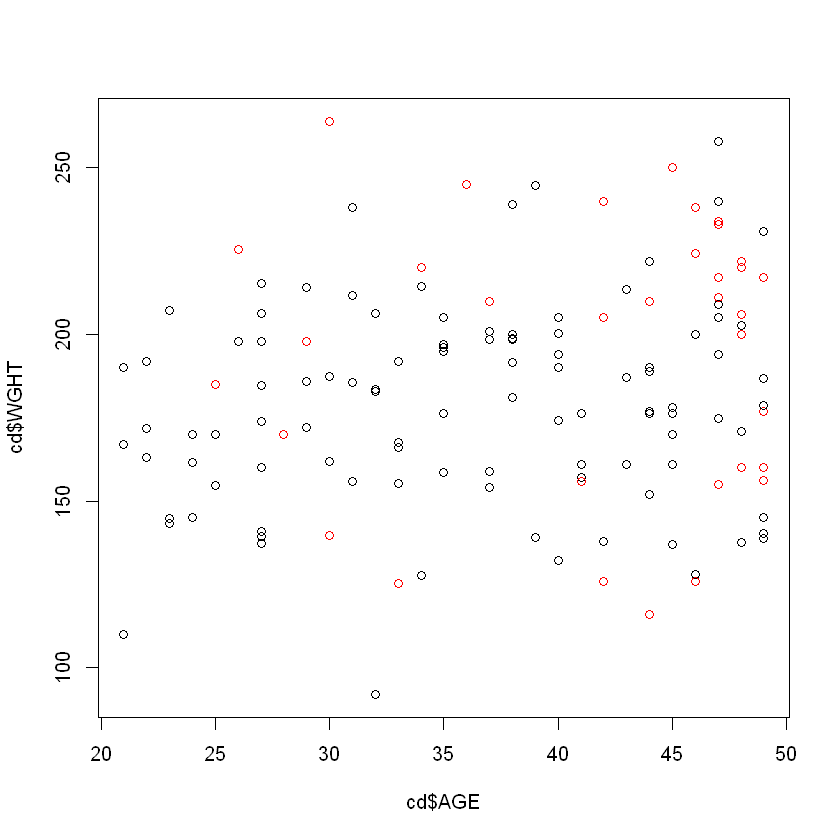

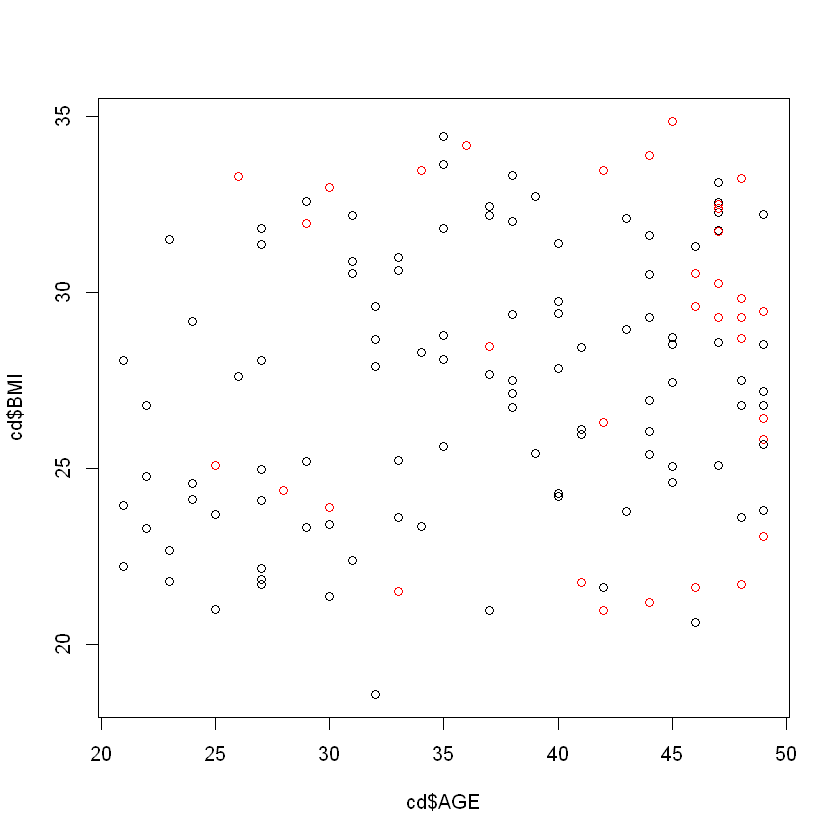

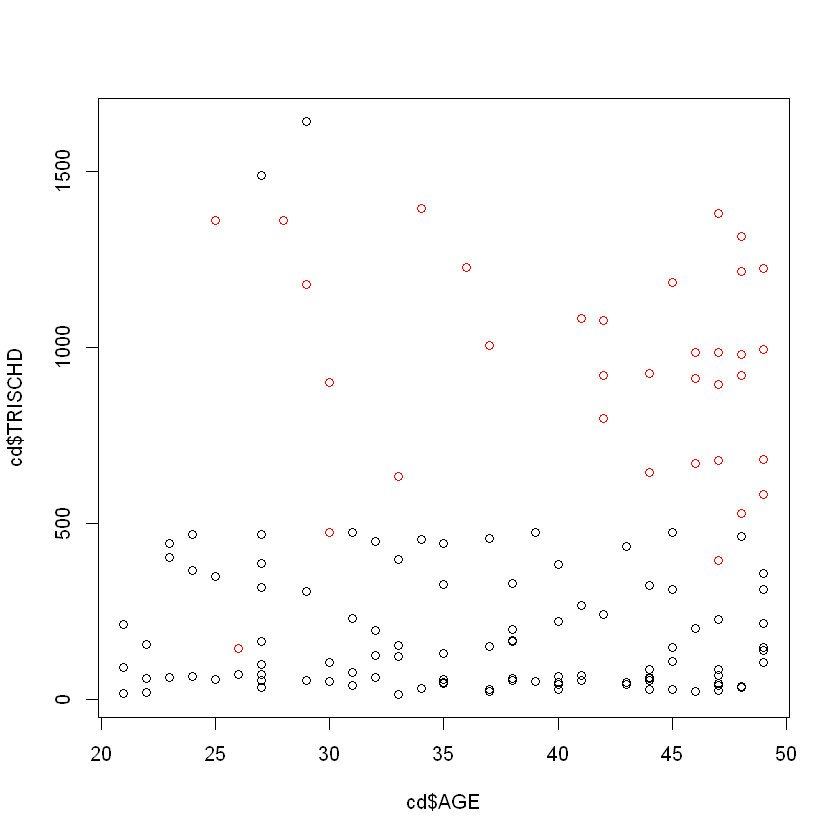

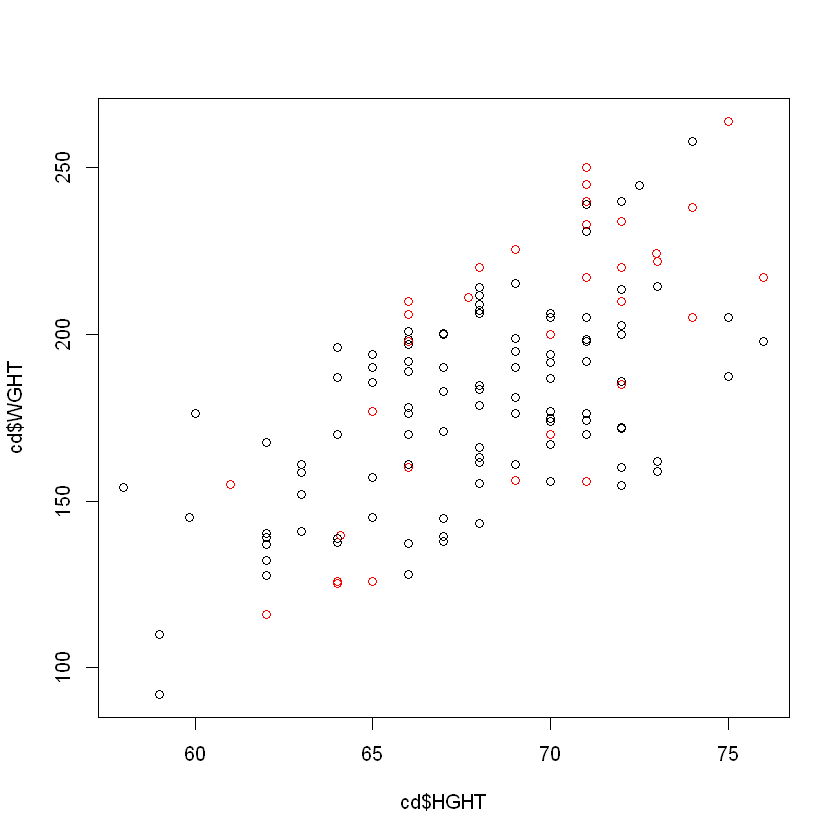

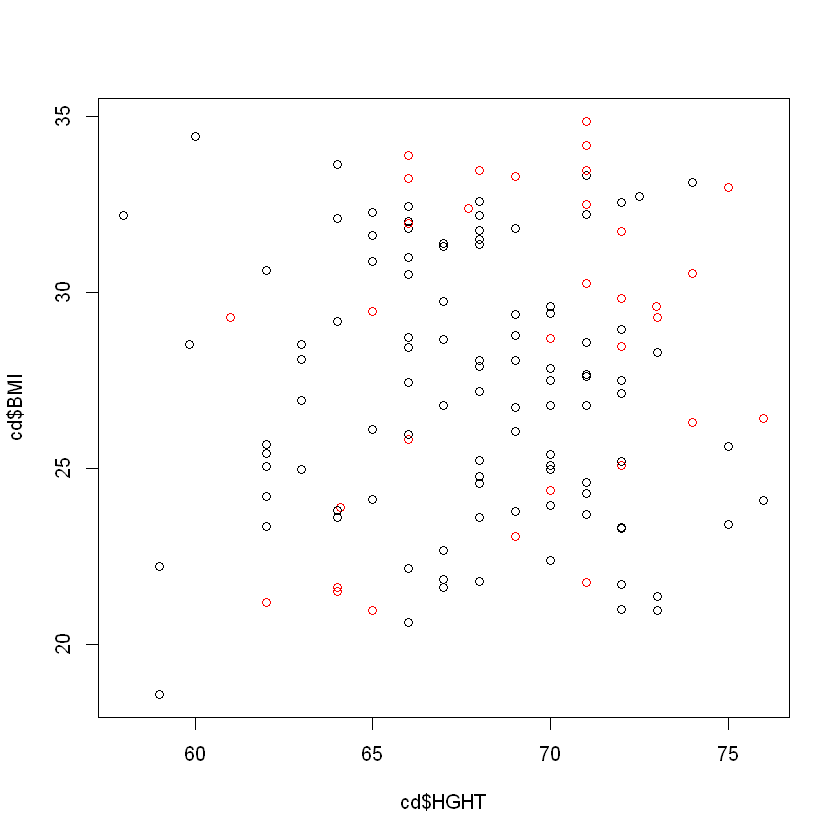

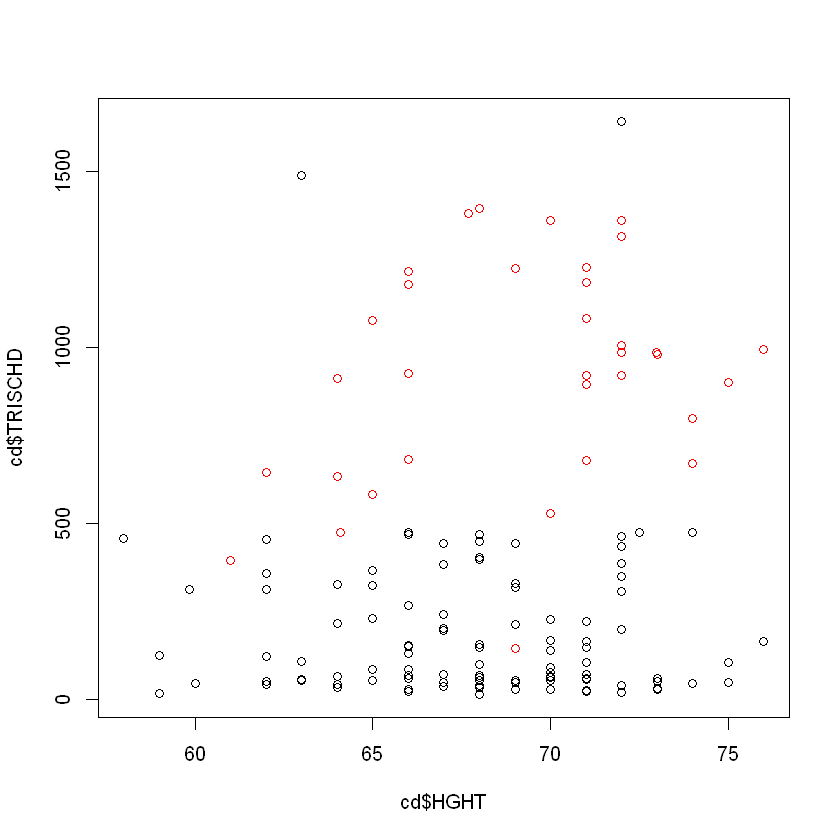

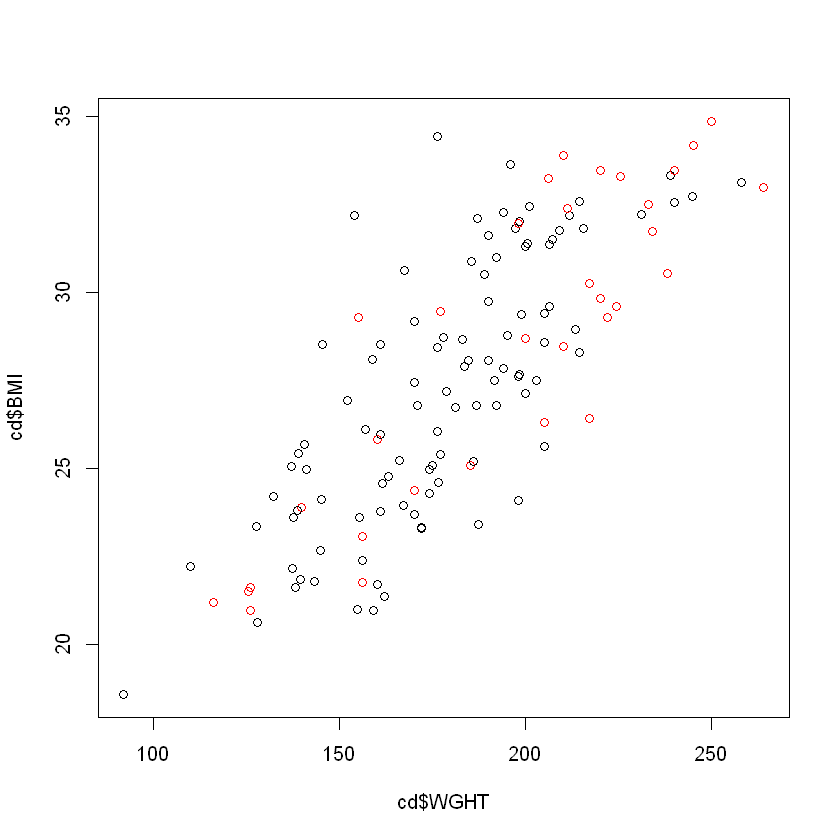

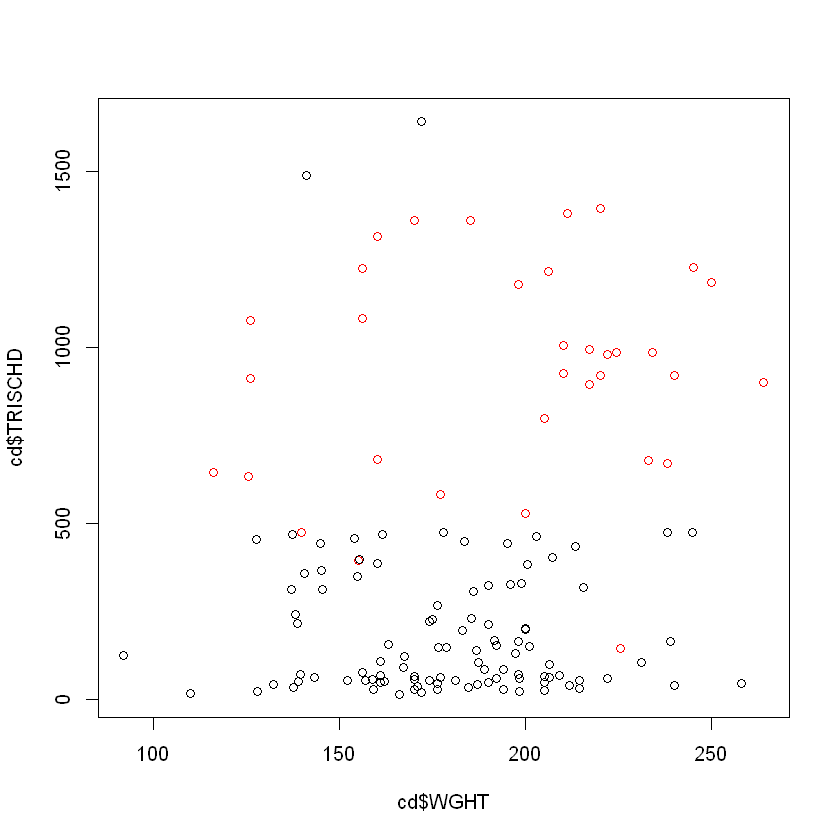

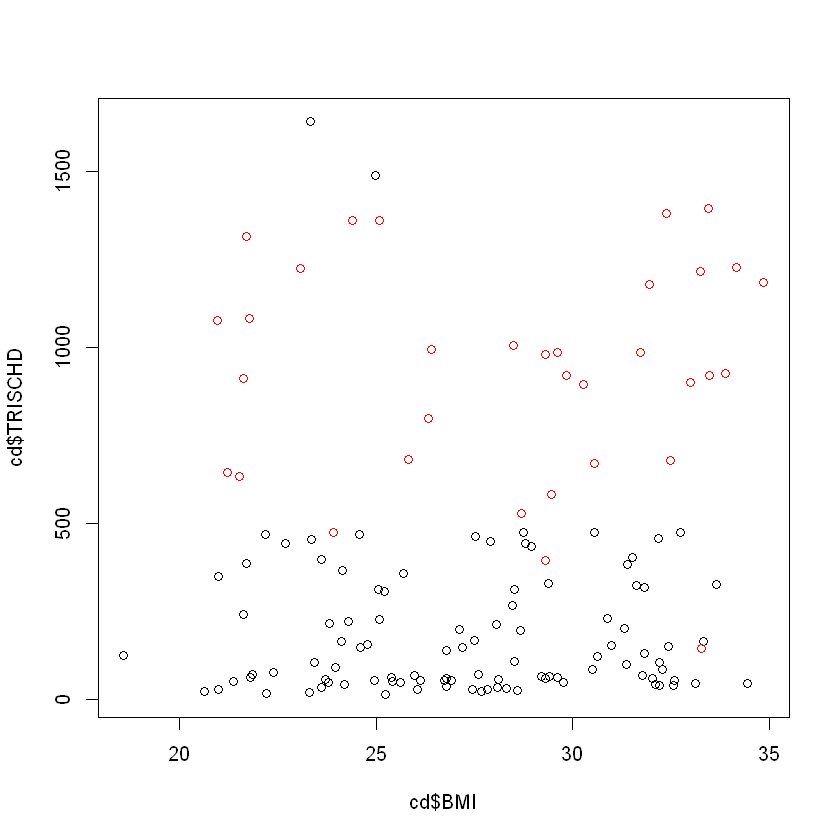

In [28]:
## Noir = Organ Donor, Rouge = Postmortem
## Rond = Homme, Croix = Femme
q1<-plot(cd$AGE, cd$HGHT, col=colors)#, pch=shapes)
q2<-plot(cd$AGE, cd$WGHT, col=colors)#, pch=shapes)
q3<-plot(cd$AGE, cd$BMI, col=colors)#, pch=shapes)
q4<-plot(cd$AGE, cd$TRISCHD, col=colors)#, pch=shapes)
q5<-plot(cd$HGHT, cd$WGHT, col=colors)#, pch=shapes)
q6<-plot(cd$HGHT, cd$BMI, col=colors)#, pch=shapes)
q7<-plot(cd$HGHT, cd$TRISCHD, col=colors)#, pch=shapes)
q8<-plot(cd$WGHT, cd$BMI, col=colors)#, pch=shapes)
q9<-plot(cd$WGHT, cd$TRISCHD, col=colors)#, pch=shapes)
q10<-plot(cd$BMI, cd$TRISCHD, col=colors)#, pch=shapes)


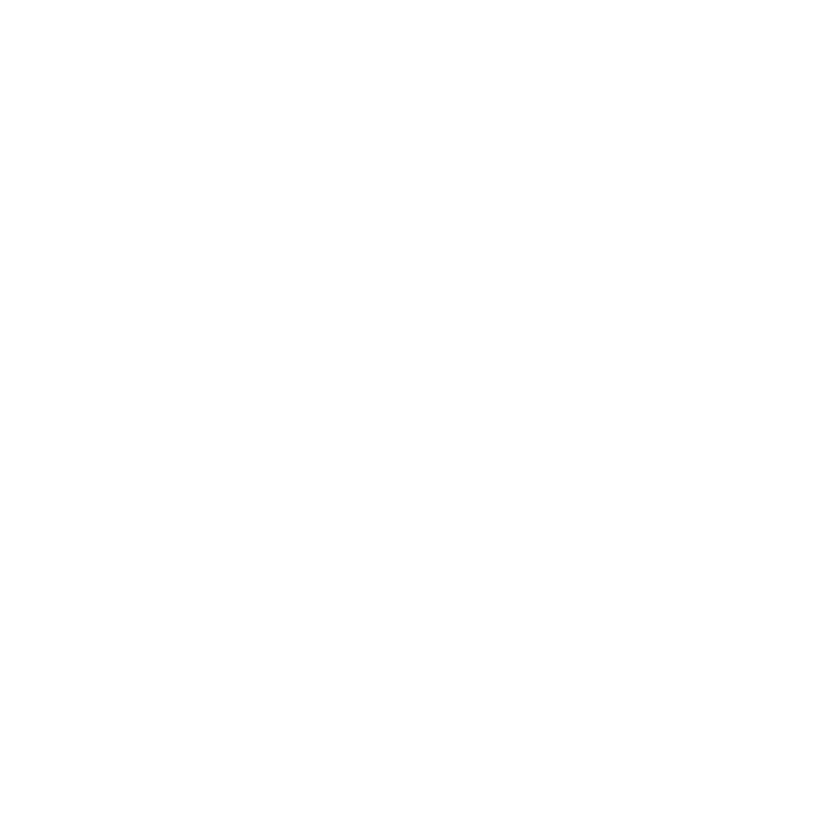

In [29]:
g<-grid.arrange(grob(q1,q2,q3,q4,q5,q6,q7,q8,q9,q10), ncol=5)

In [32]:
clrs = c("black","red","red","red","red")
clrs<-clrs[as.numeric(cd$DTHHRDY)]

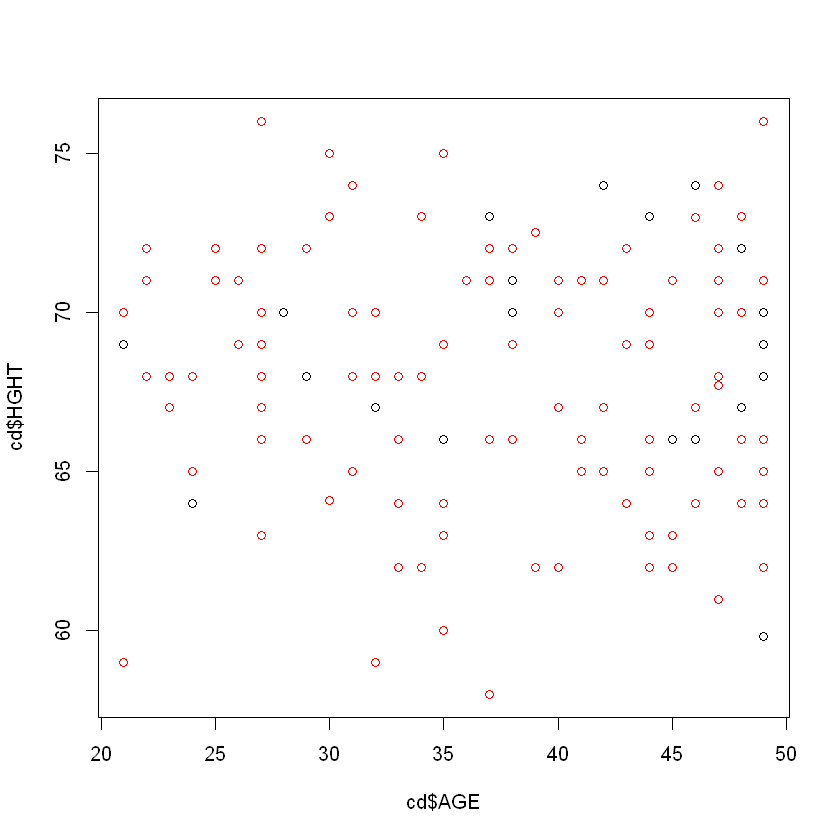

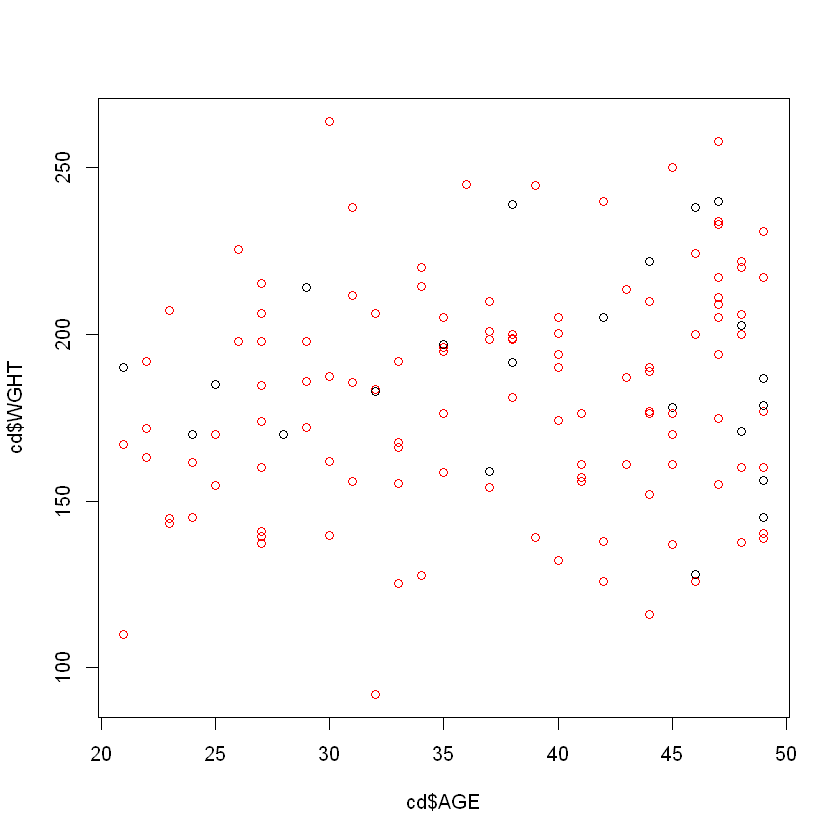

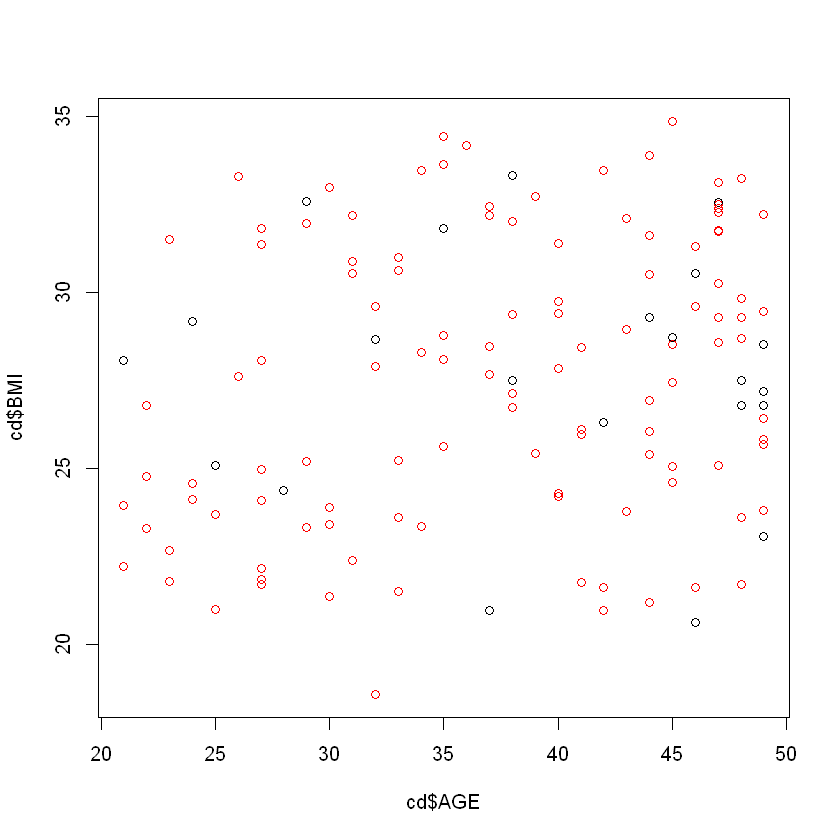

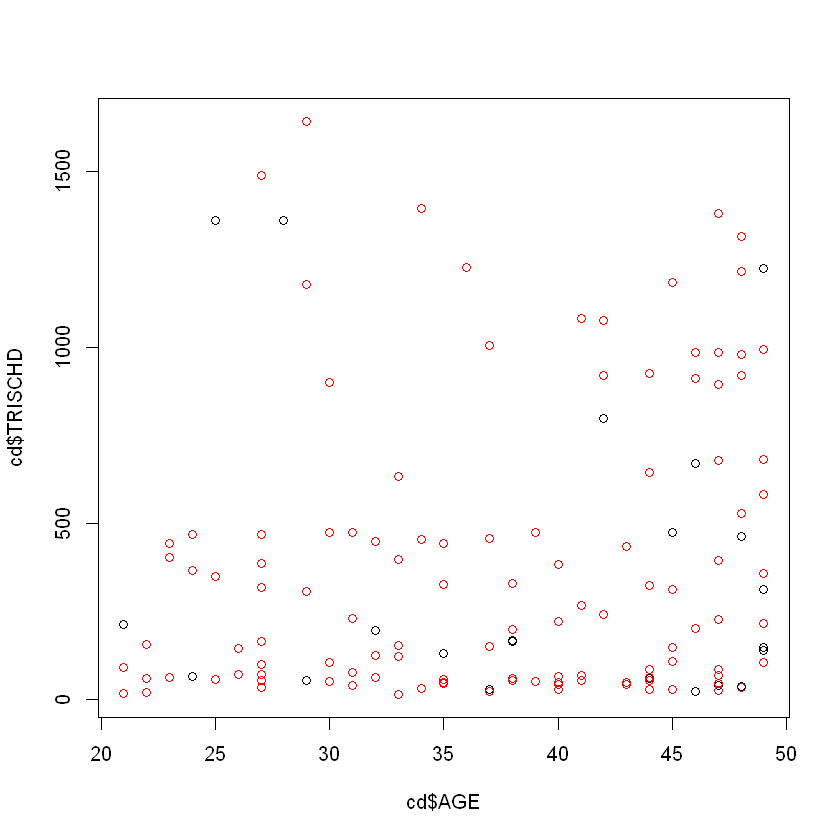

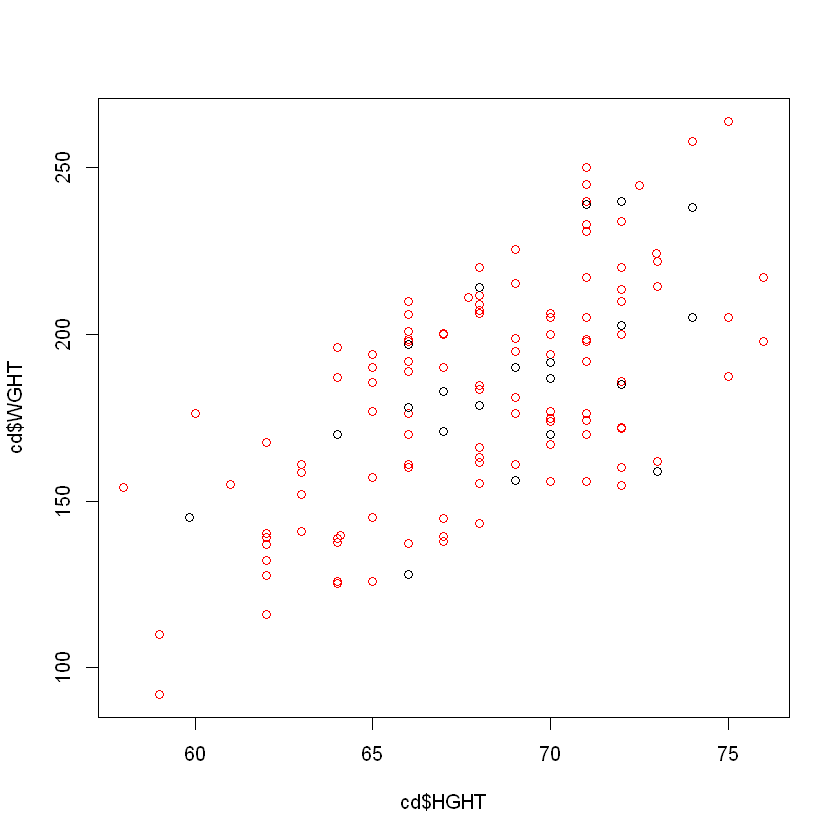

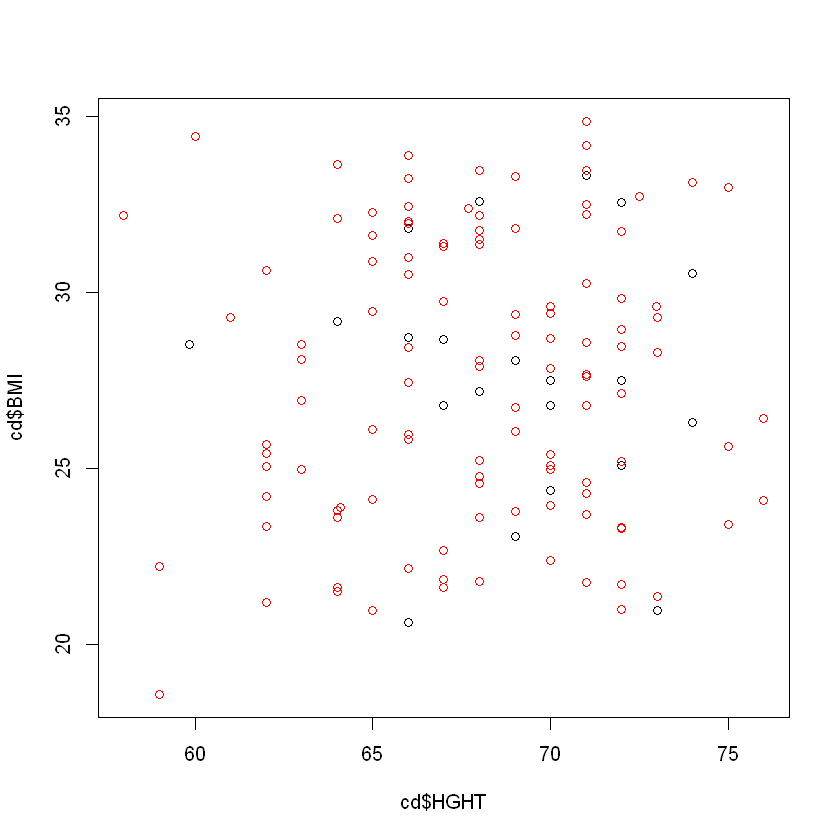

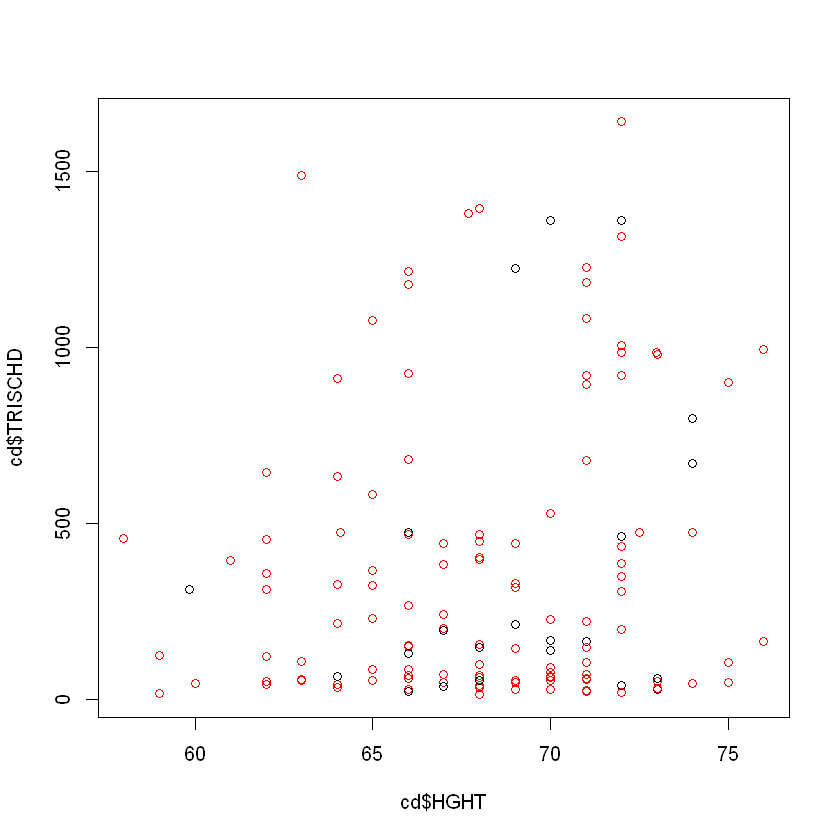

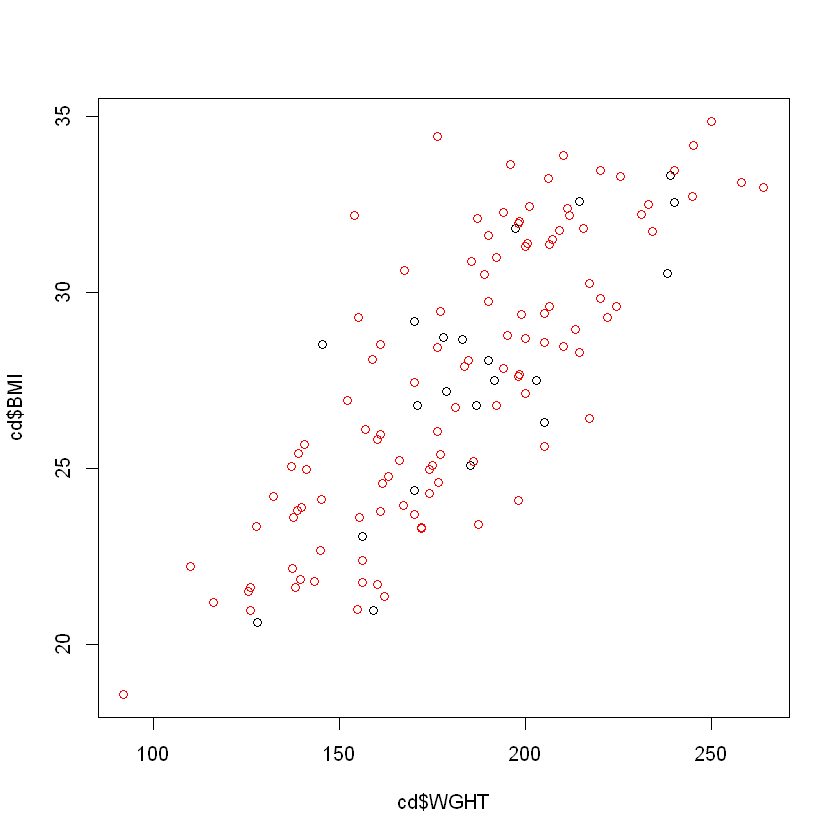

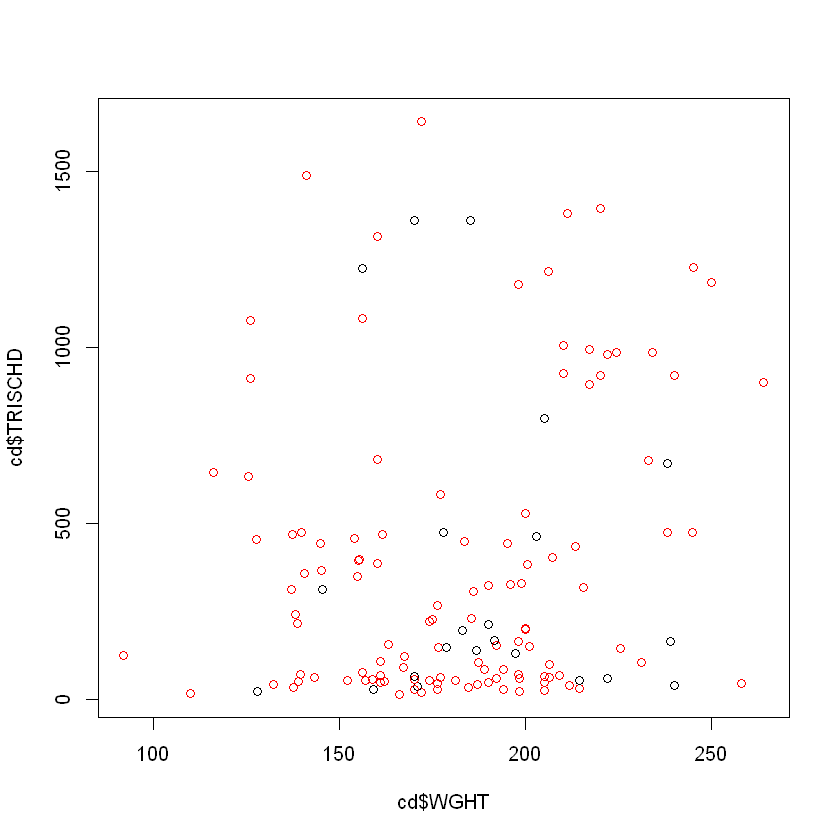

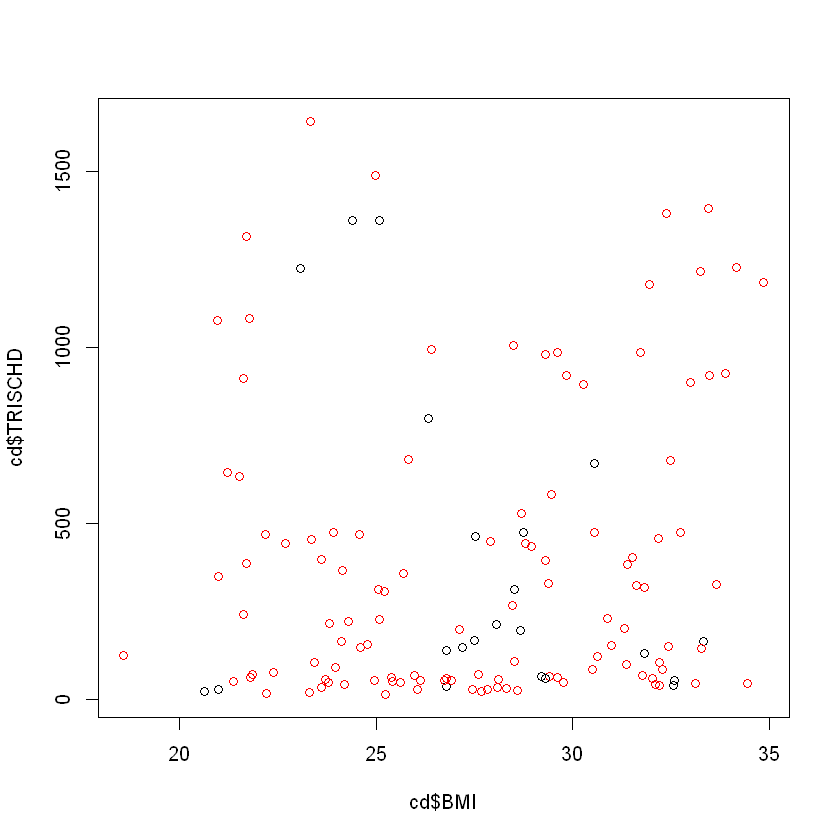

In [33]:
s1<-plot(cd$AGE, cd$HGHT, col=clrs)#, pch=shapes)
s2<-plot(cd$AGE, cd$WGHT, col=clrs)#, pch=shapes)
s3<-plot(cd$AGE, cd$BMI, col=clrs)#, pch=shapes)
s4<-plot(cd$AGE, cd$TRISCHD, col=clrs)#, pch=shapes)
s5<-plot(cd$HGHT, cd$WGHT, col=clrs)#, pch=shapes)
s6<-plot(cd$HGHT, cd$BMI, col=clrs)#, pch=shapes)
s7<-plot(cd$HGHT, cd$TRISCHD, col=clrs)#, pch=shapes)
s8<-plot(cd$WGHT, cd$BMI, col=clrs)#, pch=shapes)
s9<-plot(cd$WGHT, cd$TRISCHD, col=clrs)#, pch=shapes)
s10<-plot(cd$BMI, cd$TRISCHD, col=clrs)#, pch=shapes)
